In [1]:
import scipy.misc as misc
import numpy as np
import matplotlib.pyplot as plt
import numpy.linalg as la


#read image
def readImage(filename):
    f = misc.imread(filename, flatten=True).astype("float")
    return f

#write image
def writeImage(data,filename):
    misc.toimage(data,cmin=0,cmax=255).save(filename)

In [10]:
allSetIndex = np.arange(1, 2430)
np.random.shuffle(allSetIndex)

trainSetIndex = allSetIndex[243:]
testSetIndex = allSetIndex[:243]

print (trainSetIndex)
print (testSetIndex)

[1922  350 1139 ..., 1677 1388  165]
[1296 2049 1648  194  771 2277  434 1171  791 2068 1544 1969 1818 1873 1118
  161   20  656  294  223  902  459 2423 1354 2230  239 2222  451   68 1486
  212  723 1557 1161  172 1313 2273  655 2179   63  884 1576 1267 1253 1146
  251 1956 2191  631 2136  219  266 2327  704 1248 2061  527 1860 1238 2219
 1444 1949  827 2004  922 2379  683 2384 2084 2149 2407 1224 1113  775  100
 2399 2269 2297 1713  465 2119 1184 1518  808 2109  287  487 2415  530 1651
  570  699 2362 1692 1152 1352  535 2102 1727 1998  245  750 1528 1401  602
   70 1840 1496  195 1640 1405  506 1928  942 2366 1235 2386 2291 1182  680
 1121 1854 1100 1068 2334 1995  232 1298 2352    2  344 1089  544  158 1245
 1389 1738  166 1565  435 1202 1591  206 2326 1476 1215  184  774   75   79
  540 1971 1080 2284  270  588 1725 1643  201  234  559 1763 2050 2343 1255
 1899  340 1141 1117   97 1816 1987 1158  613  376 2275  848  481 2089 1323
 1458  397 1824 1673 1283   60 1074  222 1805 1736 

In [11]:
print(testSetIndex.size)

243


In [20]:
x_train = np.empty([trainSetIndex.size, 19*19])
for idx, val in enumerate(trainSetIndex):
    filename = 'cbcl-faces/face' + format(val, '05d') + '.pgm'
    x_train[idx] = readImage(filename).ravel()

print (x_train.shape)

x_test = np.empty([testSetIndex.size, 19*19])
for idx, val in enumerate(testSetIndex):
    filename = 'cbcl-faces/face' + format(val, '05d') + '.pgm'
    x_test[idx] = readImage(filename).ravel()

print(x_test.shape)





(2186, 361)
(243, 361)


In [30]:
mean_train = np.mean(x_train, axis=0)

x_train_zeromean = np.subtract(x_train, mean_train)

print (mean_train.shape)
print (mean_train)
print (x_train_zeromean.shape)
print (x_train_zeromean)

(361,)
[  86.0905764   110.45745654  127.48993596  137.9547118   147.44647758
  156.8147301   167.50869167  177.26532479  183.85086917  186.10201281
  184.38883806  179.08554437  171.39249771  161.99222324  153.52241537
  146.38380604  137.2168344   123.5768527   102.31884721   98.06587374
  119.16514181  130.99451052  135.12488564  137.5315645   142.12168344
  151.72461116  164.09606587  176.14730101  181.33074108  178.19624886
  167.86093321  155.25297347  143.90988106  137.64684355  136.28225069
  134.96203111  128.25343092  112.14272644  103.01967063  114.28591034
  115.08508692  109.08371455  102.48307411  101.62900274  111.68115279
  130.17566331  152.59835316  165.76120769  157.7273559   136.35864593
  116.40027447  102.47804209   99.05718207  104.49954254  111.63174748
  114.73604758  108.09560842  101.2863678   104.02333028   99.41903019
   90.62763038   79.76532479   77.89569991   84.60430009  101.60567246
  128.18023788  152.02012809  138.82799634  110.2273559    92.53293687

covariance matrices are but a special kind ofHermitian matrices. If we want to compute their eigenvaluesand eigenvetors, we should therefore resort to the NumPy func-tion eigh because, as its name indicates, eigh is speciﬁcallytailored to Hermitian matrices 

NumPy / SciPy Recipes for Data Science: Eigenvalues/Eigenvectors of Covariance Matrices (PDF Download Available). Available from: https://www.researchgate.net/publication/281455336_NumPy_SciPy_Recipes_for_Data_Science_EigenvaluesEigenvectors_of_Covariance_Matrices?channel=doi&linkId=55e8babb08ae65b63899bb36&showFulltext=true [accessed Jun 24, 2017].

In [39]:
# compute sample covariance matrix
C = np.cov(x_train_zeromean)
CD = np.dot(x_train_zeromean.T, x_train_zeromean)


# # compute eigenvalues/eigenvectors using eig
# evals, evects = la.eig(C)
# # compute eigenvalues/eigenvectors using eigh
# evalsh, evectsh = la.eigh(C)

# inds = np.argsort(evalsh)[::-1]
# evalsh = evalsh[inds]
# evectsh = evectsh[:,inds]

print (C.shape)
print (C)
print (CD.shape)
print (CD)
# print (evalsh.shape)
# print (evalsh)
# print (evectsh.shape)
# print (evectsh)

(361, 361)
[[ 2035.52131161  2109.76174993  1894.22379528 ...,   436.74710002
    283.40675151   193.70710555]
 [ 2109.76174993  2999.28720524  3105.3249721  ...,   749.40978559
    525.07776636   186.30561824]
 [ 1894.22379528  3105.3249721   3762.62072247 ...,   978.91281904
    722.08638433   225.3555034 ]
 ..., 
 [  436.74710002   749.40978559   978.91281904 ...,  2471.81588431
   2190.68621873  1409.9554766 ]
 [  283.40675151   525.07776636   722.08638433 ...,  2190.68621873
   2479.4538151   2029.6071514 ]
 [  193.70710555   186.30561824   225.3555034  ...,  1409.9554766
   2029.6071514   2726.97473123]]
(361, 361)
[[ 4447614.06587374  4609829.42360476  4138878.99268069 ...,
    954292.41354071   619243.75205855   423250.02561757]
 [ 4609829.42360476  6553442.54345837  6785135.06404392 ...,
   1637460.38151876  1147294.91948765   407077.77584629]
 [ 4138878.99268069  6785135.06404392  8221326.27859103 ...,
   2138924.50960659  1577758.74977127   492401.77493138]
 ..., 
 [  954292

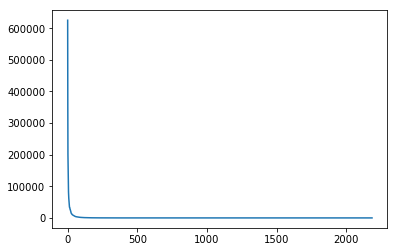

In [36]:
plt.plot(evalsh)
plt.show()

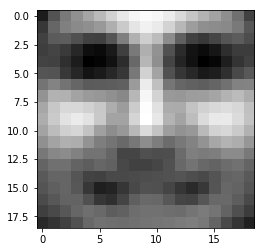

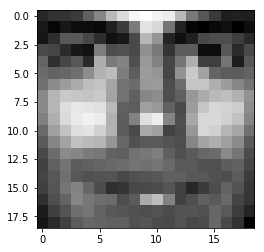

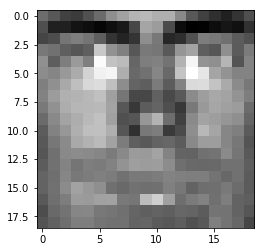

In [31]:

image1 = mean_train.reshape((19,19))
image2 = x_train[200].reshape((19,19))
image3 = x_train_zeromean[200].reshape((19,19))

plt.figure(1)
plt.imshow(image1, cmap='gray')
plt.figure(2)
plt.imshow(image2, cmap='gray')
plt.figure(3)
plt.imshow(image3, cmap='gray')
plt.show()

In [29]:
x1 = np.arange(9.0).reshape((3, 3))
x2 = np.arange(1.0, 4.0)
print (x1, x2)
print (np.subtract(x1, x2))


[[ 0.  1.  2.]
 [ 3.  4.  5.]
 [ 6.  7.  8.]] [ 1.  2.  3.]
[[-1. -1. -1.]
 [ 2.  2.  2.]
 [ 5.  5.  5.]]
